<a href="https://colab.research.google.com/github/DajeanArcila/biblioteca_pandas/blob/main/clusterdatosmixtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 383kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
import os

# Define el nombre del dataset de Kaggle
dataset = "vjchoudhary7/customer-segmentation-tutorial-in-python"

# Usa el comando Kaggle para descargar el dataset
os.system(f"kaggle datasets download -d {dataset}")

print("Dataset descargado exitosamente")


Dataset descargado exitosamente


In [ ]:
import pandas as pd
df= pd.read_csv('/content/customer-segmentation-tutorial-in-python.zip')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Padroniza dados numéricos
numerical_columns = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[numerical_columns] = df[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['Gender']
categorical_idx = df.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df, categorical=categorical_idx)

KPrototypes(gamma=0.5)

In [ ]:
model.predict(df, categorical=categorical_idx)

array([5, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 0, 5, 7, 5,
       7, 5, 3, 6, 6, 6, 3, 5, 6, 0, 3, 3, 3, 0, 6, 0, 0, 6, 0, 3, 0, 6,
       3, 0, 6, 6, 0, 3, 0, 0, 0, 6, 3, 3, 6, 3, 0, 3, 0, 3, 6, 3, 3, 6,
       6, 3, 0, 6, 3, 3, 6, 6, 3, 6, 3, 6, 6, 3, 0, 6, 3, 6, 0, 0, 0, 0,
       0, 6, 3, 6, 6, 6, 0, 3, 3, 3, 6, 3, 3, 4, 6, 4, 1, 4, 1, 4, 1, 4,
       6, 4, 1, 4, 1, 4, 1, 4, 1, 4, 6, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=uint16)

In [ ]:
# Avaliando modelo
model.cost_

169.26569458725723

In [ ]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[559.6688891233367,
 419.26271074404764,
 303.3659148103155,
 253.07838376995832,
 202.47567568819866,
 184.17357997812937,
 170.7890378841899,
 155.15203155686532,
 143.91785700136046]

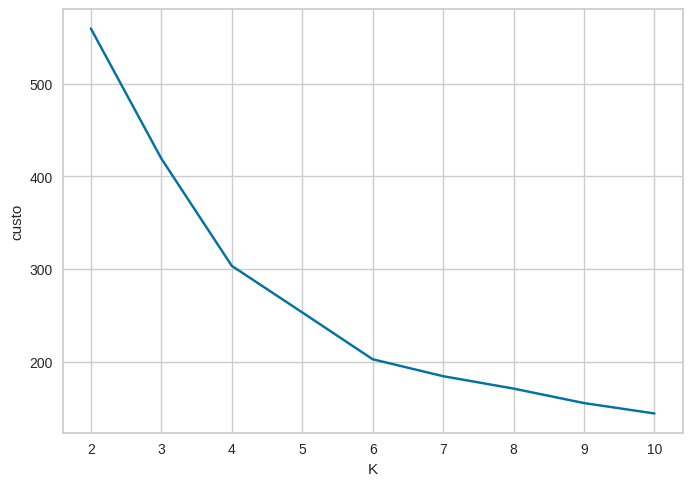

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

In [ ]:
# Añade los clústeres al DataFrame original para análisis
clusters = model.fit_predict(df, categorical=categorical_idx)
df['Cluster'] = clusters